<img src="https://upload.wikimedia.org/wikipedia/fr/a/a4/Logo_UT3.jpg" alt="Drawing" style="width: 400px;"/>

# TP n°3 : Dictionnaires

## 1 - Dictionnaires

Dans ce TP, nous allons nous intéresser aux **dictionnaires**. Les **dictionnaires** constituent un type composite mais ils n’appartiennent pas aux séquences (p.e. listes). Les dictionnaires sont modifiables mais **non-ordonnés : les couples enregistrés n’occupent pas un ordre immuable, leur emplacement est géré par un algorithme spécifique (appelé algorithme de hash)**. Ce type d'algorithme permet de retrouver très rapidement un objet, le caractère non-ordonné des dictionnaires donc est le prix à payer pour leur rapidité. 

> <div class="alert alert-block alert-danger">
<b>Syntaxe :</b><br/>
Il fonctionne par un système de <tt>cle : valeur</tt>. Les clés, comme les valeurs, peuvent être de types différents. Un dictionnaire est délimité par des accolades.    
</div>

Une clé pourra être alphabétique, numérique... en fait tout type hachable (donc liste et dictionnaire exclus). Les valeurs pourront être de tout type sans exclusion. 


## 2 - Exemples de création de dictionnaires
Dictionnaire vide

In [ ]:
d1 = {}  # alternative d1 = dict() 

Remplissage à l'aide de paramètres nommés

In [5]:
d2 = {'nom': 4, 'taille': 180}
d3 = dict(nom=5, taille=181)
print(d2,d3)

{'nom': 4, 'taille': 180} {'nom': 5, 'taille': 181}


Définition en compréhension

In [8]:
d4 = {x: x**2 for x in (2, 4, 6)}
print(d4)

{2: 4, 4: 16, 6: 36}


Utilisation d’une liste de couples clés/valeurs

In [9]:
d5 = dict([('nom', 6), ('taille', 182)]) 
print(d5)

{'nom': 6, 'taille': 182}


## 3 - Ajout/Modification/Suppression d'éléments dans un dictionnaire
Considérons le dictionnaire suivant:

In [32]:
tel = {'Mr Brown': 4098, 'Mr White': 4139}

Ajout de couples `clé : valeur`

In [33]:
tel['Mr Blue'] = 4127
tel['Mr Pink'] = 4128 

Récupération et affichage d'une valeur a partir d'une clé

In [34]:
print(tel['Mr Blue'])

4127


Modification de la valeur de la clé `Mr Pink`

In [35]:
tel['Mr Pink'] = 4129
print(tel['Mr Pink'])

4129


Suppression d'un couple `clé : valeur`

In [36]:
del tel['Mr White']
print(tel)

{'Mr Brown': 4098, 'Mr Blue': 4127, 'Mr Pink': 4129}


## 4 - Récupération des clés du dictionnaire
Il est possible de récupérer l'ensemble des clés d'un dictionnaire à l'aide de la méthode `keys()`. La syntaxe d'appel est la suivante : 
``` Python
listeCles = nom_du_dictionnaire.keys()
```

De même, il est possible de récupérer l'ensemble des valeurs d'un dictionnaire à l'aide de la méthode `values()`. La syntaxe d'appel est la suivante :
``` Python
listeValeurs = nom_du_dictionnaire.values()
```

***Attention*** : `listeCles` et `listeValeurs` sont de type `dict_keys`, ce ne sont donc pas des listes. Il faut les convertir en liste à l'aide de l'opérateur `list` pour obtenir des objets de type `liste`.
```python
    listeCles = list(nom_du_dictionnaire.keys())
    listeValeurs = list(nom_du_dictionnaire.values())
```
### Exemple :
Récupération des clés du dictionnaire `tel` : 

In [96]:
listeCles = tel.keys()
print(listeCles)
print(type(listeCles))

dict_keys(['Mr Brown', 'Mr Blue', 'Mr Pink'])
<class 'dict_keys'>


Récupération des clés du dictionnaire `tel` sous forme de liste : 

In [48]:
listeCles = list(tel.keys())
print(listeCles)
print(type(listeCles))

['Mr Brown', 'Mr Blue', 'Mr Pink']
<class 'list'>


Récupération des valeurs du dictionnaire `tel` sous forme de liste : 

In [43]:
listeValeurs = list(tel.values())
print(listeValeurs)

[4098, 4127, 4129]


Tri de la liste des clés 

In [44]:
print(sorted(listeCles))

['Mr Blue', 'Mr Brown', 'Mr Pink']


Tri de la liste des clés 

In [49]:
print(sorted(listeValeurs))

[4098, 4127, 4129]


##  5 - Test d'appartenance à un dictionnaire

> <div class="alert alert-block alert-danger">
<b>Tests d'appartenance :</b><br/>
Les tests d'appartenance permettent de déterminer rapidement (grâce à l'algorithme de hash) si une clé est présente ou non dans le dictionnaire. Le mot clé utilisé est <tt>in</tt> et l'opération renvoie un booléen. La syntaxe complète est la suivante : <br/> 
<tt>clé à chercher in dictionnaire</tt><br/> 
ou <br/> 
<tt>clé à chercher not in dictionnaire</tt>
</div>

Considérons le dictionnaire `tel` défini au paragraphe précédent. Testons si la clé `Mr Orange` est dans in `tel`.

In [37]:
print('Mr Orange' in tel) 
print('Mr Orange' not in tel)

False
True


## 6 - La méthode `get`

La méthode :
```Python 
dico.get(cle,valeur_def)
```

retourne la valeur de la `cle` si `cle` est présente dans le dictionnaire `dico`, `valeur_def` sinon. Si le deuxième argument `valeur_def` n'est pas renseigné, la valeur renvoyé par défaut est `None`. `valeur_def` peut être une valeur numérique ou une chaine de caractères.   

In [52]:
tel = {'Mr Brown': 4098, 'Mr Blue': 4127, 'Mr Pink': 4127}
print(tel.get('Mr Brown'))
print(tel.get('Mr Black','Never assigne'))
print(tel.get('Mr Black',0))
print(tel.get('Mr Black'))

4098
Never assigne
0
None


La méthode `get` est très utile pour construire des histogrammes (i.e. un graphique représentant la fréquence d'apparition des éléments d'un ensemble). Considérons par exemple le texte suivant :  

```Python
texte = "voici devant toi un humble vétéran du vaudeville, envoyé dans le vilain rôle ou revêtu en victime selon les vicissitudes de la vie"
```
<img src="https://i.imgur.com/hN9kmpz.png" alt="Drawing" style="width: 300px;"/>

Le but est de construire, de manière itérative, un dictionnaire `lettre` représentant l'histogramme de `texte`, c'est-à-dire la fréquence d'apparition de chacune des lettres de `texte`. Le code est le suivant : 

```Python
lettres = {}
for c in texte:
        lettres[c] = lettres.get(c, 0) + 1
print(lettres)
```

Analysons ce programme. Le dictionnaire `lettres` est initialement vide. Puis à chaque tour de boucle, une clé `c` (correspondant au caractère `c` de `texte`) est ajoutée à `lettres` dont la valeur est :
* 1 si `c` n'a pas été préalablement rentrée dans `lettres`,
* la valeurs de la clé `c` + 1, si `c` est déjà dans `lettres`.

Puis, à l'aide d'une fonction d'affichage : 
```Python
def plotDictionnaire(dico):
    plt.bar(list(dico.keys()), dico.values(), color='g')
    plt.xlabel('Lettre')
    plt.ylabel('Occurence')
    plt.show()
```
Il est possible de tracer l'histogramme de `texte` :

{'v': 11, 'o': 5, 'i': 12, 'c': 3, ' ': 22, 'd': 6, 'e': 15, 'a': 6, 'n': 8, 't': 6, 'u': 7, 'h': 1, 'm': 2, 'b': 1, 'l': 9, 'é': 3, 'r': 3, ',': 1, 'y': 1, 's': 6, 'ô': 1, 'ê': 1}


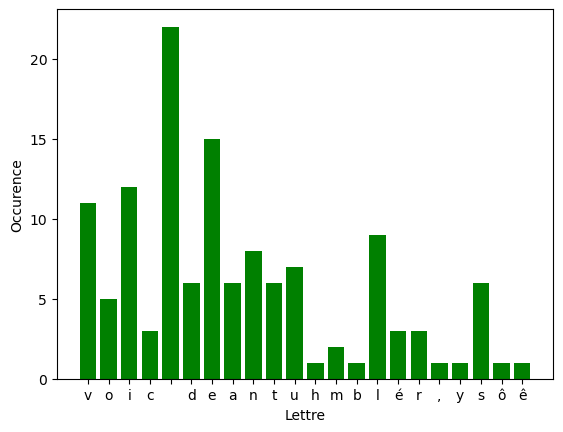

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# afficher l'histogramme à l'aide de matplotlib
def plotDictionnaire(dico):
    plt.bar(list(dico.keys()), dico.values(), color='g')
    plt.xlabel('Lettre')
    plt.ylabel('Occurence')
    plt.show()

texte = "voici devant toi un humble vétéran du vaudeville, envoyé dans le vilain rôle ou revêtu en victime selon les vicissitudes de la vie"
lettres = {}
for c in texte:
        lettres[c] = lettres.get(c, 0) + 1
print(lettres)

plotDictionnaire(lettres)



### Exercice 1 :
Le but de cette question est de créer une table des occurrences de chaque mot dans un texte. Pour cela, vous commencerez par écrire la fonction `convert_texte(texte)` qui élémine tous les signes de ponctuations de la chaine de caractères `texte` en remplaçant tous les caractères non-alphabétiques par des espaces. Vous devrez utiliser la chaines de caractères : 

`alpha = 'abcdefghijklmnopqrstuvwxyzéèàùçâêîôûäëïöü'` 

et la méthode <a href="https://www.w3schools.com/python/ref_string_split.asp">`split()`</a>

Cette méthode s'utilise de la manière suivante : si `txt` contient la chaine de caractères `"welcome to the jungle"` alors `txt.split()` contient la liste `['welcome', 'to', 'the', 'jungle']`.

In [3]:
txt = "welcome to the jungle"
x = txt.split()
print(x)

['welcome', 'to', 'the', 'jungle']


En outre, il est possible de spécifier en paramètre le séparateur, par défaut, c'est l'espacement simple.

In [4]:
txt = "welcome#to#the#jungle"
x = txt.split('#')
print(x)

['welcome', 'to', 'the', 'jungle']


Ensuite, vous modifierez le programme de la question 1 afin de créer une table des occurrences de chaque mot dans le texte. Vous testerez votre programme sur le texte contenu dans la variable `texte_ex1` :

<img src="https://i.imgur.com/Nuh9WpO.jpg" alt="Drawing" style="width: 300px;"/>


In [54]:
texte_ex2 = "'La marche des vertueux élèves est semée d'obstacles qui sont les entreprises égoïstes que fait sans fin surgir l'oeuvre des fainéants. Béni soit l'enseignant de bonne volonté qui, au nom de l'informatique, se fait le berger des faibles qu'il guide dans la vallée d'ombre, de la mort et des larmes, car il est le gardien du module et la providence des élèves égarés. J'abattrai alors le bras d'une terrible colère, d'une vengeance furieuse et effrayante sur les hordes impies de ceux qui ne viennent pas en cours et réduisent à néant la pédagogie de Dieu. Et tu connaîtras pourquoi mon nom est l'éternel quand sur toi s'abattra la vengeance du tout puissant responsable de module' - librement inspiré de Jules Winnfield"
print(texte_ex2)

'La marche des vertueux élèves est semée d'obstacles qui sont les entreprises égoïstes que fait sans fin surgir l'oeuvre des fainéants. Béni soit l'enseignant de bonne volonté qui, au nom de l'informatique, se fait le berger des faibles qu'il guide dans la vallée d'ombre, de la mort et des larmes, car il est le gardien du module et la providence des élèves égarés. J'abattrai alors le bras d'une terrible colère, d'une vengeance furieuse et effrayante sur les hordes impies de ceux qui ne viennent pas en cours et réduisent à néant la pédagogie de Dieu. Et tu connaîtras pourquoi mon nom est l'éternel quand sur toi s'abattra la vengeance du tout puissant responsable de module' - librement inspiré de Jules Winnfield


In [55]:
def convert_texte(texte):
    alpha = 'abcdefghijklmnopqrstuvwxyzéèàùçâêîôûäëïöü'    
    lettres = ""           # nouvelle chaîne à construire (unicode)
    for c in texte:
        c = c.lower()       # conversion de chaque caractère en minuscule
        if c in alpha:
            lettres = lettres + c
        else:
            lettres = lettres + ' '
    mots = lettres.split() # conversion de la chaîne résultante en une liste de mots
    return(mots)

# construction de l'histogramme :
mots_ex2 = convert_texte(texte_ex2)
dico ={}
for m in mots_ex2:
    dico[m] = dico.get(m, 0)+1
    
print(dico)    

{'la': 6, 'marche': 1, 'des': 5, 'vertueux': 1, 'élèves': 2, 'est': 3, 'semée': 1, 'd': 4, 'obstacles': 1, 'qui': 3, 'sont': 1, 'les': 2, 'entreprises': 1, 'égoïstes': 1, 'que': 1, 'fait': 2, 'sans': 1, 'fin': 1, 'surgir': 1, 'l': 4, 'oeuvre': 1, 'fainéants': 1, 'béni': 1, 'soit': 1, 'enseignant': 1, 'de': 7, 'bonne': 1, 'volonté': 1, 'au': 1, 'nom': 2, 'informatique': 1, 'se': 1, 'le': 3, 'berger': 1, 'faibles': 1, 'qu': 1, 'il': 2, 'guide': 1, 'dans': 1, 'vallée': 1, 'ombre': 1, 'mort': 1, 'et': 5, 'larmes': 1, 'car': 1, 'gardien': 1, 'du': 2, 'module': 2, 'providence': 1, 'égarés': 1, 'j': 1, 'abattrai': 1, 'alors': 1, 'bras': 1, 'une': 2, 'terrible': 1, 'colère': 1, 'vengeance': 2, 'furieuse': 1, 'effrayante': 1, 'sur': 2, 'hordes': 1, 'impies': 1, 'ceux': 1, 'ne': 1, 'viennent': 1, 'pas': 1, 'en': 1, 'cours': 1, 'réduisent': 1, 'à': 1, 'néant': 1, 'pédagogie': 1, 'dieu': 1, 'tu': 1, 'connaîtras': 1, 'pourquoi': 1, 'mon': 1, 'éternel': 1, 'quand': 1, 'toi': 1, 's': 1, 'abattra': 1,

## 7 - Tableur et dictionnaires

Il existe plusieurs librairies permettant d'importer et de travailler avec des tableurs de type Excel. Pour rester dans le domaine des logiciels ouverts nous nous limiterons dans ces TPs aux fichiers ***.csv*** pour Comma-Separated Values. C'est un format texte ouvert représentant des données tabulaires sous forme de valeurs séparées par des virgules. Par exemple, si l'on dispose du fichier `personnes.csv` représentant les données suivantes : 

<img src="https://i.imgur.com/83FYUix.png" alt="Drawing" style="width: 500px;"/>

Alors, il est possible de l'importer à l'aide de librairie `csv` de la manière suivante : 

In [73]:
import csv
lecture = csv.DictReader(open('personnes.csv'))

Dans ce cas, la variable `lecture` est un itérateur, c'est-à-dire une sorte de curseur qui se déplace dans une séquence d'objets représentant les données du tableur. Pour s'en convaincre, il suffit de convertir `lecture` en liste et de l'afficher :

In [74]:
listePersonnes=list(lecture)
print(listePersonnes)

[{'id_personne': '1', 'nom': 'Labrosse', 'prenom': 'Adam', 'anneeNaissance': '2000'}, {'id_personne': '2', 'nom': 'Gemlamorte', 'prenom': 'Adèle', 'anneeNaissance': '1985'}, {'id_personne': '3', 'nom': 'Auboisdormant', 'prenom': 'Abel', 'anneeNaissance': '2001'}, {'id_personne': '4', 'nom': 'Etpan', 'prenom': 'Ahmed', 'anneeNaissance': '1975'}, {'id_personne': '5', 'nom': 'Térieur', 'prenom': 'Alain', 'anneeNaissance': '1999'}, {'id_personne': '6', 'nom': 'Térieur', 'prenom': 'Alex', 'anneeNaissance': '1976'}, {'id_personne': '7', 'nom': 'Proviste', 'prenom': 'Alain', 'anneeNaissance': '2000'}, {'id_personne': '8', 'nom': 'Verse', 'prenom': 'Alain', 'anneeNaissance': '1970'}, {'id_personne': '9', 'nom': 'Ception', 'prenom': 'Alex', 'anneeNaissance': '2001'}, {'id_personne': '10', 'nom': 'Ainé', 'prenom': 'Ali', 'anneeNaissance': '1975'}, {'id_personne': '11', 'nom': 'Gator', 'prenom': 'Ali', 'anneeNaissance': '2001'}, {'id_personne': '12', 'nom': 'Bistraux', 'prenom': 'Alonzo', 'anneeN

On constate alors que lecture est une "sorte" de liste dont chaque élément est un dictionnaire ayant pour clé les données du tableur (`id_personne`, `nom`, `prenom` et `anneNaissance`) et les valeurs de chaque lignes du tableur `personnes.csv`. 

Pour récupérer une valeur qui nous intéresse, il suffit alors d'aller la chercher dans la ligne correspondante. Par exemple, pour afficher la date de naissance d'Andy Rectdustade, il faut récupérer la 14ème (puisqu'on part de 0...) et d'afficher la valeur de la clé `anneNaissance` :

In [83]:
print(listePersonnes[14]['anneeNaissance'])

2000


### Exercice 2 : la base de données des jeux vidéos.

Le fichier `jeux.csv` contient la liste des jeux-vidéo dont les ventes ont dépassé les 100 000 copies vendues.

![jeux](https://i.imgur.com/M2k0Cnw.png)

Les attributs proposés dans le fichier sont : 
- Rank - le classement du jeu, selon le nombre de ventes globales
- Name - le nom du jeu 
- Platform - la plateforme sur lequel le jeu est sorti (PC,PS4, etc.)
- Year - l'année de sortie du jeu
- Genre - le genre du jeu (Sports, Plateform, Shooter...)
- Publisher - l'éditeur du jeu
- NA_Sales - le total de ventes (en millions de copies vendues) pour les Etats Unis
- EU_Sales - le total de ventes (en millions de copies vendues) pour l'Europe
- JP_Sales - le total de ventes (en millions de copies vendues) pour le Japon
- Other_Sales - le total de ventes (en millions de copies vendues) pour le reste du monde
- Global_Sales - le total de ventes (en millions de copies vendues) pour le monde (somme des 4 autres colonnes)

Pour chaque question, vous devez proposer *du code* qui permet de répondre à la question, et fournir une réponse explicite, sous forme d'une instruction ```print``` qui présente votre réponse.


### Structure du fichier

#### 1 - Quel est le nom du jeu en première position dans le fichier ?

In [89]:
import csv
fichier = csv.DictReader(open("jeux.csv"))
jeux = list(fichier)

print("Le premier jeu du fichier est ", jeux[0]["Name"])

Le premier jeu du fichier est  Wii Sports


#### 2 - Combien de jeux sont présents dans ce fichier ?

In [90]:
print("Le fichier contient ", len(jeux), "jeux.")

Le fichier contient  16598 jeux.


### Recherches

#### 3 - Afficher les différentes clefs (les noms de colonnes) contenues dans le fichier.

In [91]:
print(jeux[0].keys())

dict_keys(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])


#### 4 -  Afficher les nom, le rank, et l'année de sortie du jeu en position 651 ("Zumba Fitness")
On rappelle que les tableaux sont numérotés en partant de  0 . Le premier jeu est donc en position 0, le second jeu en position 1...

In [92]:
print(jeux[651]["Name"], jeux[651]["Rank"], jeux[651]["Year"])

Zumba Fitness 652 2010


#### 5 - Le jeu "Splatoon" est il dans la liste ? Donner son classement, et le nombre de ventes en Europe.
Attention, il y a plusieurs jeux sortis en 2004 dans la liste, je vous demande de n'afficher que le premier que vous rencontrez dans la liste, pas les suivants. Il faut donc arrêter de parcourir la liste une fois que le jeu a été trouvé.

In [93]:
# Solution 1
i=0
while jeux[i]["Name"] != "Splatoon" :
    i=i+1
print("Trouvé, ", jeux[i]["Name"], jeux[i]["Rank"], jeux[i]["EU_Sales"])    
    
# Solution 2 : en pratique, c'est celle-là que l'on fait car on l'itération de boucle est plus lisible.
for jeu in jeux:
    if jeu["Name"] == "Splatoon":
        print("Trouvé, ", jeu["Name"], jeu["Rank"], jeu["EU_Sales"])
        break

Trouvé,  Splatoon 236 1.15
Trouvé,  Splatoon 236 1.15


### Agrégations

#### 6 - Donner le nom du premier jeu dans le classement sorti en 2004.
Pour cela, vous écrirez une fonction `cherche` qui prend en entrée `annee`, l'année de recherche, et renvoie le premier jeu du classemement sortie lors de l'année de recherche.  Si aucun jeu n'est trouvé, l'indiquer. 

***Attention***, certaines années sont mal positionnées, et contiennent les caractères `"N/A"`. Votre code ne doit pas planter, par exemple, il doit simplement prouver qu'il n'y a pas de jeux sortis en 1975...

In [98]:
def cherche(annee):
    for jeu in jeux:
        if jeu["Year"] != "N/A" and int(jeu["Year"]) == annee:
            return jeu
    return None
            
jeu = cherche(1975)
if not jeu is None:
    print("Trouvé, ", jeu["Name"], jeu["Rank"])
else:
    print("Inconnu")

Inconnu


#### 7 - Quel est l'année du jeu le plus récent contenu dans la liste ?

In [101]:
max = -1
lePremierjeu = None
for jeu in jeux:
    if jeu["Year"] != "N/A":
        annee = int(jeu["Year"])
        if annee > max:
            max = annee
            lePremierjeu = jeu
print("Jeu le plus récent : ", max, ", ", lePremierjeu["Name"], ", ", lePremierjeu["Rank"])

Jeu le plus récent :  2020 ,  Imagine: Makeup Artist ,  5959


#### 8 - Le jeu "Doom" est présent plusieurs fois dans la liste. Quel est le nombre total de ventes en Europe pour les jeux pour ce jeu ?¶

In [102]:
somme = 0 
for jeu in jeux:
    if jeu["Name"] == "Doom":
        somme = somme + float(jeu["EU_Sales"])

print("Ventes totales pour le jeu Doom :", somme)

Ventes totales pour le jeu Doom : 0.33999999999999997


#### 9 - Quelle est l'année moyenne de sortie pour les jeux présents dans la liste ?
Vous donnerez la réponse sous forme d'un nombre flottant. ***Attention***, on ne tiendra compte que des jeux pour lesquels l'année est précisée et différente de "N/A"
> On rappelle que la moyenne se calcule en faisant la somme des années de sortie des différents jeux, puis en divisant par le nombre de jeux pris en considération.

In [104]:
somme = 0
nb = 0
for jeu in jeux:
    if jeu["Year"] != "N/A":
        nb = nb + 1
        somme = somme + int(jeu["Year"])
print("Année moyenne :", somme/nb)

Année moyenne : 2006.4064433147546


### Filtrage

#### 10 - Retourner la liste des 3 jeux dont le nom est "Doom" dans cette liste. Vous afficherez pour chacun le rang, la plateforme sur lequel celui-ci est sorti et le nom de son éditeur.


In [106]:
dooms = []
for jeu in jeux:
    if jeu["Name"] == "Doom":
        dooms.append(jeu)
for doom in dooms:
    print(doom["Rank"], doom["Platform"], doom["Publisher"])

2636 PS Infogrames
9087 GBA Activision
14602 PC id Software


#### 11 - Retourner la liste des 5 jeux les mieux classés dont le nombre de ventes au Japon est plus grand que le nombre de ventes en Europe. 
Vous afficherez le classement, le nom, le nombre de ventes au Japon et le nombre de ventes en Europe pour les jeux concernés.

In [ ]:
liste = []
for jeu in jeux:
    if float(jeu["JP_Sales"]) > float(jeu["EU_Sales"]):
        liste.append(jeu)

for i in range(5):
    print(liste[i]["Rank"],liste[i]["Name"],liste[i]["JP_Sales"],liste[i]["EU_Sales"])

#### 12 - Donner la liste des jeux produits par Ubisoft ayant dépassés les deux millions de vente en Europe.
Vous procéderez par double filtrage, d'abord la liste des jeux produits par Ubisoft (hors Ubisoft Annecy), puis un second filtrage pour ne conserver que les jeux répondant au critère.

In [ ]:
ubi = []
for jeu in jeux:
    if jeu["Publisher"] == "Ubisoft":
        ubi.append(jeu)

blockbusters = []
for jeu in ubi:
    if float(jeu["EU_Sales"]) > 2:
        blockbusters.append(jeu)

for jeu in blockbusters:
    print(jeu["Name"])

### Traitements plus complexes

#### 13 - Donner le nombre total de copies de jeu vendues (Global_Sales) par des jeux dont le nom *contient* la chaîne de caractère "Doom" mais qui ne contient pas la chaîne "SpongeBob".
On veut donc la somme des ventes de Doom, Doom 2, Final Doom...quelle que soit la plateforme...

> Pour détecter si une chaîne contient une sous-chaîne on pourra utiliser l'opérateur ```in```. Exemple : 
```Python
print("LA" in "TRALALALA") # True
print("DO" in "TRALALALA") # False
```

In [107]:
somme = 0
for jeu in jeux:
    if "Doom" in jeu["Name"] and "SpongeBob" not in jeu["Name"]:
        print(jeu["Name"], jeu["Global_Sales"])
        somme = somme + float(jeu["Global_Sales"])
print("\n----> Somme : ", somme)

Doom II: Hell on Earth 3.61
Doom (2016) 1.39
Doom 3 1.34
Doom 0.78
Doom 3: Resurrection of Evil 0.71
Doom (2016) 0.68
Doom 3 BFG Edition 0.59
Doom 3 BFG Edition 0.49
Doom 64 0.47
Kingdom Under Fire: Circle of Doom 0.37
Final Doom 0.27
Doom (2016) 0.18
Doom 0.14
Doom 3 0.1
Death Jr. and the Science Fair of Doom 0.08
Myth Makers: Orbs of Doom 0.05
Doom II: Hell on Earth 0.04
Doom 3 BFG Edition 0.03
Doom 0.03
Butt-Ugly Martians: Zoom or Doom! 0.02

----> Somme :  11.369999999999997


#### 14 - Le fichier contient 16598 jeux, pourtant le "ranking" va de 1 à 16600. Il y a donc deux  incohérences dans le fichier. Par exemple, il n'y a pas de jeu classé en position 654. Quelle est la seconde position manquante dans le fichier ?

In [ ]:
n = 0
for jeu in jeux:
    m = int(jeu["Rank"])
    if m != n + 1:
        print("Problème sur ", jeu["Name"], m,  " j'attendais", n+1)
    n = m

#### 15 - Présenter, pour chaque `Genre` de jeux, le nombre de copies vendues (`Global_Sales`). 
Il n'est pas demandé de trier les résultats (ça viendra...). Vous pourrez introduire un dictionnaire, qui associe à chaque `genre` le nombre de copies vendues. Il n'est pas nécessaire de parcourir plusieurs fois le fichier pour arriver au résultat.

In [111]:
genres = {}
for jeu in jeux:
    genre = jeu["Genre"]
    if genre in genres:
        genres[genre] = float(jeu["Global_Sales"]) + genres[genre]
    else:
        genres[genre] = float(jeu["Global_Sales"])

for genre in genres:
        print(genre, genres[genre])

Sports 1330.929999999988
Platform 831.3699999999974
Racing 732.0399999999955
Role-Playing 927.3699999999941
Puzzle 244.9500000000005
Misc 809.9599999999936
Shooter 1037.3699999999901
Simulation 392.19999999999783
Action 1751.1799999999691
Fighting 448.90999999999923
Adventure 239.04000000000138
Strategy 175.1200000000004
